### 1. Loading dependencies and data

In [1]:
## Se cargan los datos usando la librearía de UCIM como se indica en la página
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

np.random.seed(seed=1)

# fetch dataset 
loaded_dataset = fetch_ucirepo(id=30) 
  
# data (as pandas dataframes) 
X = loaded_dataset.data.features 
y = loaded_dataset.data.targets

obj_var = y.columns[0]

## Concat data to get an unique dataframe
df = pd.concat([X, y], axis=1)
df.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


### 2. Preprocessing data

In [2]:
## data length
rows, cols = df.shape
print(f'Total {rows=}')
print(f'Total {cols=}')

Total rows=1473
Total cols=10


In [3]:
## Data types:
df.info()

## Detailed info from cols:
"""
   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use, 2=Long-term, 3=Short-term
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   wife_age                  1473 non-null   int64
 1   wife_edu                  1473 non-null   int64
 2   husband_edu               1473 non-null   int64
 3   num_children              1473 non-null   int64
 4   wife_religion             1473 non-null   int64
 5   wife_working              1473 non-null   int64
 6   husband_occupation        1473 non-null   int64
 7   standard_of_living_index  1473 non-null   int64
 8   media_exposure            1473 non-null   int64
 9   contraceptive_method      1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


"\n   1. Wife's age                     (numerical)\n   2. Wife's education               (categorical)      1=low, 2, 3, 4=high\n   3. Husband's education            (categorical)      1=low, 2, 3, 4=high\n   4. Number of children ever born   (numerical)\n   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam\n   6. Wife's now working?            (binary)           0=Yes, 1=No\n   7. Husband's occupation           (categorical)      1, 2, 3, 4\n   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high\n   9. Media exposure                 (binary)           0=Good, 1=Not good\n   10. Contraceptive method used     (class attribute)  1=No-use, 2=Long-term, 3=Short-term\n"

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


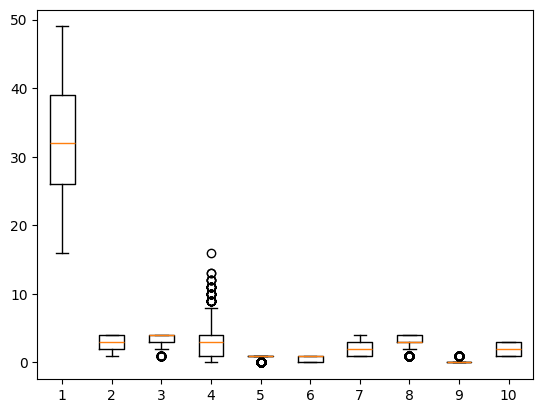

In [4]:
## Box plot by attrib
display(df.describe())

plt.boxplot(df)
plt.show()

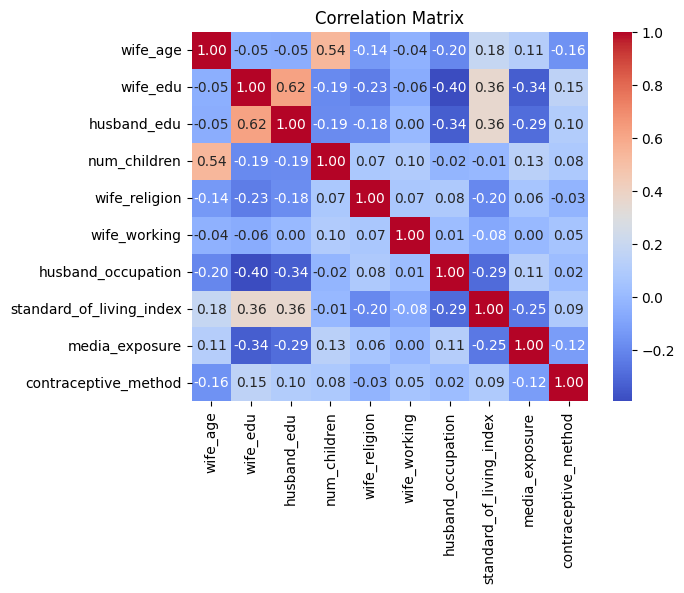

In [5]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
## Count prediction varaible objetive labels distribution
df[obj_var].value_counts()

contraceptive_method
1    629
3    511
2    333
Name: count, dtype: int64

In [7]:
## Null values
display(df.isnull().sum(axis=0))

wife_age                    0
wife_edu                    0
husband_edu                 0
num_children                0
wife_religion               0
wife_working                0
husband_occupation          0
standard_of_living_index    0
media_exposure              0
contraceptive_method        0
dtype: int64

In [8]:
## There is a class imbalance so
g = df.groupby(obj_var)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
balanced_df

C:\Users\ccsar\AppData\Local\Temp\ipykernel_25080\263310703.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


wife_age  wife_edu  husband_edu  num_children  \
contraceptive_method                                                      
1                    0          49         4            4             6   
                     1          44         3            4             4   
                     2          44         4            2             8   
                     3          22         2            2             2   
                     4          24         3            4             2   
...                            ...       ...          ...           ...   
3                    328        22         3            4             3   
                     329        38         3            4             7   
                     330        36         4            4             3   
                     331        23         2            3             2   
                     332        37         3            4             5   

                          wife_religion  wife_working  husband_occupation  \
contraceptive_method                                                        
1                    0                0             0                   1   
                     1                1             0                   1   
                     2                1             1                   3   
                     3                1             1                   3   
                     4                1             1                   2   
...                                 ...           ...                 ...   
3                    328              1             1                   2   
                     329              1             1                   3   
                     330              1             1                   1   
                     331              1             0                   3   
                     332              1             0                   2   

                          standard_of_living_index  media_exposure  \
contraceptive_method                                                 
1                    0                           4               0   
                     1                           3               0   
                     2                           3               0   
                     3                           1               0   
                     4                           4               0   
...                                            ...             ...   
3                    328                         3               0   
                     329                         2               0   
                     330                         4               0   
                     331                         2               0   
                     332                         4               0   

                          contraceptive_method  
contraceptive_method                            
1                    0                       1  
                     1                       1  
                     2                       1  
                     3                       1  
                     4                       1  
...                                        ...  
3                    328                     3  
                     329                     3  
                     330                     3  
                     331                     3  
                     332                     3  

[999 rows x 10 columns]

In [9]:
## Transforming cathegorical data:
from sklearn.preprocessing import LabelEncoder, scale

encode_cols = ['wife_edu', 'husband_edu', 'husband_occupation', 'standard_of_living_index']
labelencoder = LabelEncoder() 
for col in encode_cols:
    # balanced_df[col] = labelencoder.fit_transform(balanced_df[col])
    balanced_df[col] = balanced_df[col].astype("category")


## scale numerical data
numerical_cols = ['wife_age', 'num_children']
for col in numerical_cols:
    balanced_df[col] = scale(balanced_df[col])

In [10]:
## Manage outliers
from pyod.models.knn import KNN   # kNN detector

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(balanced_df)

outlier, outlier_confidence = clf.predict(balanced_df, return_confidence=True)
pd.Series(outlier).value_counts()

0    923
1     76
Name: count, dtype: int64

### 3. Modelling

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Define test_size as % of total data
test_size = 0.20

def train_logistic_regresion(balanced_df:pd.DataFrame, test_size:float=test_size) -> int:

    ## Divide dataframe into train and test data
    divided_data = train_test_split(balanced_df.drop(obj_var, axis=1), 
                                    balanced_df[obj_var], 
                                    test_size=test_size, 
                                    random_state=11)
    X_train, X_test, y_train, y_test = divided_data
    
    ## Train model
    logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01, random_state=11)
    logisticRegr.fit(X_train, y_train)

    ## Apply model to test dataset
    predictions = logisticRegr.predict(X_test)

    ## Get accuracy
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

In [12]:
## Conjunto original (Transformando datos categóricos, si aplica)

results = []

txt = 'Conjunto original (Transformando datos categóricos, si aplica)'
accuracy = train_logistic_regresion(balanced_df)
results.append([txt, accuracy])

print(f'{txt}: {accuracy:,.4%}')

Conjunto original (Transformando datos categóricos, si aplica): 53.0000%


In [13]:
## Conjunto sin datos faltantes
balanced_df.dropna(inplace=True)

txt = 'Conjunto sin datos faltantes'
accuracy = train_logistic_regresion(balanced_df)
results.append([txt, accuracy])

print(f'{txt}: {accuracy:,.4%}')

Conjunto sin datos faltantes: 53.0000%


In [14]:
## Conjunto sin datos faltantes ni atípicos
balanced_df['outlier'] = outlier
cond = (balanced_df['outlier'] == 1)
balanced_df = balanced_df[~cond].drop(columns='outlier')
balanced_df.reset_index(drop=True, inplace=True)

txt = 'Conjunto sin datos faltantes ni atípicos'
accuracy = train_logistic_regresion(balanced_df)
results.append([txt, accuracy])

print(f'{txt}: {accuracy:,.4%}')

Conjunto sin datos faltantes ni atípicos: 54.5946%


In [15]:
## Conjunto sin datos faltantes, ni atípicos, ni correlacionados
correlated_features = corr_matrix.stack().reset_index()
correlated_features = correlated_features[~(correlated_features[0] == 1)]
cond = (correlated_features[0] < -0.85) | (correlated_features[0] > 0.85)
correlated_features = correlated_features[cond]

if correlated_features.empty:
    print('No hay columnas correlacionadas')
else:
    drop_cols = correlated_features['level_0'].unique()
    drop_cols = list(drop_cols)
    print('corrigiendo para: ', drop_cols)
    balanced_df.drop(columns=drop_cols, inplace=True)

txt = 'Conjunto sin datos faltantes, ni atípicos, ni correlacionados'
accuracy = train_logistic_regresion(balanced_df)
results.append([txt, accuracy])

print(f'{txt}: {accuracy:,.4%}')

No hay columnas correlacionadas
Conjunto sin datos faltantes, ni atípicos, ni correlacionados: 54.5946%


In [16]:
## Resultados finales
pd.DataFrame(results, columns=['Descripción', 'Precisión'])

,Descripción,Precisión
0,Conjunto original (Transformando datos categór...,0.530000
1,Conjunto sin datos faltantes,0.530000
2,Conjunto sin datos faltantes ni atípicos,0.545946
3,"Conjunto sin datos faltantes, ni atípicos, ni ...",0.545946


#### Qué actividades tienen más impacto en el desempeño

Se ha observado que las actividades de preprocesamiento aplicadas al conjunto de datos no han generado un impacto significativo en el rendimiento del modelo de regresión logística. Esto sugiere que el conjunto de datos inicial presentaba una calidad estándar, no tenía datos faltantes y en relación a la completitud del dataset, no se tenían muchos datos atípicos. Aunque sí se mejora quitando los datos atípicos, la estimación aumenta un 1% en cuando al accuracy